# <strong style="color: tomato;">Object Detection</strong> $\color{blue}{\text{}}$
---

## <span style="color: yellowgreen;">1. </span>Introduction.

Goals:
- Understand various object detection methods, slowly build up to more complex methods as we go along,
    - Template Matching
        - Simply looking for an exavt copy of an image in another image
    - Corner Detection
        - Looking for corners in images
    - Edge Detection
        - Expanding to find general edges of objects
    - Grid Detection
        - Combining both concepts (corner + edge) to find grids in images (useful for applications)
    - Contour detection
        - Allows us to detect foreground vs background images
        - Allow for detection of external vs internal contours (e.g. grabbing the eyes and smile from a cartoon smile face)
    - Feature Matching
        - More advanced methods of detecting matching objects in another image, even if the target image is not shown exactly the same in the image we are searching
    - Watershed Algorithm
        - Advanced algorithm that allows us to segment images into foreground and background
        - Allows us to manually set seeds to choose segments of an image
    - Facial and Eye Detection
        - We will use Haar Cascades to detect facces in images
        - This <strong style="font-size: 1.2em; text-transform: uppercase; color: tomato; text-decoration: underline;">is not</strong> <strong style="text-transform: uppercase;">facial recognition</strong>, that requires deep learning which will be discussed in a future section
- Project assessment at the end of the section - we will builda full computer vision application that can blur license plates automatically

## <span style="color: yellowgreen;">2. </span>Template matching.

- Simplest form of object detection
- Simply scans a larger image for a provided template by sliding the template target image across the larger image
- Main option that can be adjusted is the comparison method used as the target template is slid across the larger image
    - The methods are all some sort of correlation based metric
.<div style="height: 200px;">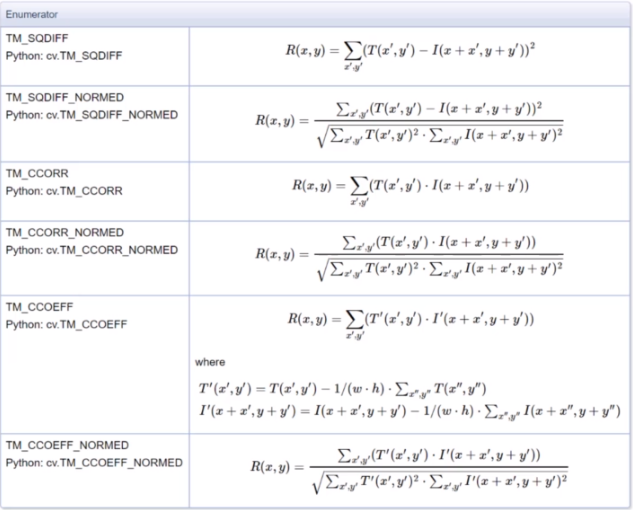</div>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
full = cv2.imread('../Computer-Vision-with-Python/DATA/sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)
plt.imshow(full)

Upload the template image which is subset of larger image we are searching:

In [ ]:
face = cv2.imread('../Computer-Vision-with-Python/DATA/sammy_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
plt.imshow(face)

---
eval function (digression):

In [ ]:
sum([1, 2, 3]) # sum of a list
mystring = 'sum' # it is not the function it is a string
eval(mystring) # evaluate the string => this looks like the function "sum"
myfunc = eval(mystring) # assign the sum function to the myfunc variable => we can now do myfunc([1, 2, 3]) and the result will be 6
# eval can transform a string that matches a built in function and then actuall run that

---

In [ ]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [ ]:
for m in methods:
    # create the copy of the image so that we can not accidentally mess it up
    full_copy = full.copy()
    method = eval(m)

    # TEMPLATE MATCHING
    res = cv2.matchTemplate(full_copy, face, method)
    # result is basically a heatmap showing where it thinks the match is
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc # (x, y)
    else:
        top_left = max_loc

    height, width, chanells = face.shape
    bottom_right = (top_left[0] + width, top_left[1] + height)

    cv2.rectangle(full_copy, top_left, bottom_right, (255, 0, 0), 5)

    plt.subplot(121) # give me a plot that is 1 row by 2 columns, grab the 1st one
    plt.imshow(res)
    plt.title('HEATMAP of Template Matching')

    plt.subplot(122) # give me a plot that is 1 row by 2 columns, grab the 2nd one
    plt.imshow(full_copy)
    plt.title('DETECTION of Template Matching')
    
    # SUPER TITLE => here title everything as a method used
    plt.suptitle(m)

    # without this line the subplots will constantly overwrite eachother and at the end we will only have one plot
    plt.show()

    # print 2 new lines - ONLY FOR AESTHETICS
    print('\n\n')

## <span style="color: yellowgreen;">3. </span>Corner detection.

### <span style="color: royalblue;">a) </span>Part one - Harris Corner Detection

<span style="font-weight: bold; font-size: 1.2em; margin-left: 0em;">What is a corner?</span>
- A corner is a point whose local neighborhood stands in two dominant and different edge directions.
- Simply put it is a junction of two edges, where an edge is a sudden change in image brightness.

The Harris Corner Detection:
- Was published in 1988 
- The basic intuition is that corners can be detected by looking for significant change in all directions
- Flat regions will have no change in all directions
- Edges will not have a major change along the direction of the edge

Shi-Tomasi Corner Detection:
- Published in 1994
- It made a small modification to the Harris Corner Detection which ended up with better results
- It changes the scoring function selection criteria that Harris uses
    - Harris: $$R = \lambda_1\lambda_2 - k(\lambda_1 + \lambda_2)$$
    - Shi-Tomasi: $$R = min(\lambda_1 + \lambda_2)$$

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
flat_chess = cv2.imread('../Computer-Vision-with-Python/DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)
gray_flat_chess = cv2.imread('../Computer-Vision-with-Python/DATA/flat_chessboard.png', 0)
real_chess = cv2.imread('../Computer-Vision-with-Python/DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)
gray_real_chess = cv2.imread('../Computer-Vision-with-Python/DATA/real_chessboard.jpg', 0)

In [ ]:
gray = np.float32(gray_flat_chess)
# src; blockSize - neighborhood size; kernel size; k - Harris detector free parameter
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

# SHOWING PURPOSES ONLY:
dst = cv2.dilate(dst, None) # has nothing to do with corner detection it is just to show the results
flat_chess[dst > 0.01*dst.max()] = [255, 0, 0] # RGB; wherever the result of the cornerHarris image is greater than the 10% of its max value in the original image => red
plt.imshow(flat_chess)

In [ ]:
gray = np.float32(gray_real_chess)
# src; blockSize - neighborhood size; kernel size; k - Harris detector free parameter
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

# SHOWING PURPOSES ONLY:
dst = cv2.dilate(dst, None) # has nothing to do with corner detection it is just to show the results
real_chess[dst > 0.01*dst.max()] = [255, 0, 0] # RGB; wherever the result of the cornerHarris image is greater than the 10% of its max value in the original image => red
plt.imshow(real_chess)

### <span style="color: royalblue;">b) </span>Part two - Shi-Tomasi Detection

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
flat_chess = cv2.imread('../Computer-Vision-with-Python/DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)
gray_flat_chess = cv2.imread('../Computer-Vision-with-Python/DATA/flat_chessboard.png', 0)
real_chess = cv2.imread('../Computer-Vision-with-Python/DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)
gray_real_chess = cv2.imread('../Computer-Vision-with-Python/DATA/real_chessboard.jpg', 0)

In [ ]:
# src; max no of corners we want; corner quality parameter; min distance
corners = cv2.goodFeaturesToTrack(gray_flat_chess, 64, 0.01, 10)

corners = np.int0(corners)
for i in corners:
    x, y = i.ravel()
    cv2.circle(flat_chess, (x, y), 3, (255, 0, 0), -1)

plt.imshow(flat_chess)

In [ ]:
corners = cv2.goodFeaturesToTrack(gray_real_chess, 80, 0.01, 10)

corners = np.int0(corners)
for i in corners:
    x, y = i.ravel()
    cv2.circle(real_chess, (x, y), 3, (255, 0, 0), -1)
plt.imshow(real_chess)

## <span style="color: yellowgreen;">4. </span>Edge detection.

Canny edge detector
- one of the most popular edge detection algorithms 
- it is a multi-stage algorithm

The process:
- apply Gaussian filter to smooth the image in order to remove the noise
- find the intensity gradients of the image
- apply non-maximum suppression to get rid of spurious response to edge detection
- apply double threshold to determine potential edges
- track edge by hysteresis: finalize the detection of edges by suppressing all the other edges that are weak and not connected to strong edges (filtration process)

For high resolution images where you only want general edges, it is usually a good idea to apply a custom blur before applying the Canny Algorithm.

The Canny Algorithm also requires a user to decide on low and high threshold values. We will have an equation for picking a good starting point for threshold values, but often we will need to adjust it to our particular image.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
img = cv2.imread('../Computer-Vision-with-Python/DATA/sammy_face.jpg')
plt.imshow(img)
# we do not care about the wrong channel order in edge detection

In [ ]:
# src; threshold 1; threshold 2
# edges = cv2.Canny(image=img, threshold1=127, threshold2=127)
edges = cv2.Canny(image=img, threshold1=0, threshold2=255)
plt.imshow(edges)

Formula to calculate a good threshold (works really well after applying the blur):

In [ ]:
# median value
med_val = np.median(img)

# lower & upper bound threshold
lower = int(max(0, .7*med_val)) # thresh 1 = either 0 or .7 of the median value, whicheveer is greater
upper = int(min(255, 1.3*med_val)) # thresh 2 = either 255 or 1.3 of the median value, whichever is smaller

In [ ]:
edges = cv2.Canny(image=img, threshold1=lower, threshold2=upper+120) # we can now start to modify the threshold BUT it will perform better oce we blured the image
plt.imshow(edges)

Blurring the image to improve the quality of edge detection:

In [ ]:
blurred_img = cv2.blur(img, (7, 7))
edges = cv2.Canny(image=blurred_img, threshold1=lower, threshold2=upper+30)
plt.imshow(edges)

## <span style="color: yellowgreen;">5. </span>Grid detection.

- Often cameras can create a distortion in an image, such as radial distortion and tangential distortion.
- A good way to account for these distortions when performing operations like object tracking is to have a recognizable pattern attached to the object being tracked
- Grid patterns are often used to calibrate cameras and track motion
- OpenCV has built in methods for tracking grids and chessboard like patterns.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
flat_chess = cv2.imread('../Computer-Vision-with-Python/DATA/flat_chessboard.png')
plt.imshow(flat_chess)

In [ ]:
# This method works only for chessboard patterns. EXACTLY that style
# src; grid size
found, corners = cv2.findChessboardCorners(flat_chess, (7, 7)) # even though the grid is 8x8, because we will not be able to detect the outer edges anyway
# returns a boolean whether it was found AND a list of corner coordinates
cv2.drawChessboardCorners(flat_chess, (7, 7), corners, found) # draws on the original image
plt.imshow(flat_chess)

Circle based grids:

In [ ]:
dots = cv2.imread('../Computer-Vision-with-Python/DATA/dot_grid.png')
# src; grid size; the method of searching
found, corners = cv2.findCirclesGrid(dots, (10, 10), cv2.CALIB_CB_SYMMETRIC_GRID)
if found:
    cv2.drawChessboardCorners(dots, (10, 10), corners, found)
    plt.imshow(dots)

## <span style="color: yellowgreen;">6. </span>Contour detection.

- Contours are defined as simply a curve joining all the continuous points (along the boundary), having same color or intensity
- Contours are a useful tool for shape analysis and object detection and recognition
- OpenCV has a built in Counter finder function that can also help us differentiate between internal and external contours

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**findContours()**

function will return back contours in an image, and based on the RETR method called, you can get back external, internal, or both:

* cv2.RETR_EXTERNAL:Only extracts external contours
* cv2.RETR_CCOMP: Extracts both internal and external contours organized in a two-level hierarchy
* cv2.RETR_TREE: Extracts both internal and external contours organized in a  tree graph
* cv2.RETR_LIST: Extracts all contours without any internal/external relationship

In [ ]:
img = cv2.imread('../Computer-Vision-with-Python/DATA/internal_external.png', 0)
# src; mode of finding the contours int/ext; method of finding the contours
# this mode of finding the contours grabs both internal and external
image, contours, hierarchy = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
# contours - list
# hierarchy - np array

Draw external contours:

In [ ]:
# Set up empty array
external_contours = np.zeros(image.shape)

# For every entry in contours
for i in range(len(contours)):
    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[0][i][3] ==-1:
        # We can now draw the external contours from the list of contours
        cv2.drawContours(external_contours, contours, i, 255, -1)
plt.imshow(external_contours, 'gray')

Draw internal contours:

In [ ]:
# Create empty array to hold internal contours
internal_contours = np.zeros(image.shape)

# Iterate through list of contour arrays
for i in range(len(contours)):
    # If third column value is NOT equal to -1 than its internal
    if hierarchy[0][i][3] != -1:
        # Draw the Contour
        cv2.drawContours(internal_contours, contours, i, 255, -1)
plt.imshow(internal_contours, 'gray')

## <span style="color: yellowgreen;">7. </span>Feature matching.

- So far we’ve learned a lot of technical syntax, but haven’t really been able to apply it to more complex computer vision applications. From now on we will be using all our technical knowledge and syntax skills with OpenCV to create programs that are directly applicable to realistic situations! We will begin by discussing Feature Matching.
- We’ve already seen template matching to find objects within a larger image, but it required an **exact copy** of the image. Often that isn’t useful in a real world situation!
- Feature matching extracts defining key features from an input image (using ideas from corner, edge, and contour detection)
- Then using a distance calculation, finds all the matches in a secondary image. This means we are no longer required to have an exact copy of the target image!

We will check out 3 methods:
- Brute-Force Matching with ORB Descriptors
- Brute-Force Matching with SIFT Descriptors and Ratio Test
- FLANN based Matcher

We will be testing a generic cereal image and seeing if we can find its matching box in the cereal aisle.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize = (12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [ ]:
reeses = cv2.imread('../Computer-Vision-with-Python/DATA/reeses_puffs.png', 0)
# display(reeses)

In [ ]:
# target image
cereals = cv2.imread('../Computer-Vision-with-Python/DATA/many_cereals.jpg', 0)
# display(cereals)

### <span style="color: royalblue;">a) </span>Brute-Force Matching with ORB Descriptors:

In [ ]:
# creating the detector
orb = cv2.ORB_create()

# src of image we are looking for; possible mask; 
# returns keypoints and descriptors
kp1, des1 = orb.detectAndCompute(reeses, None)
kp2, des2 = orb.detectAndCompute(cereals, None)

# way of detecting matchings; 
bruteForce = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# where the matches occur
matches = bruteForce.match(des1, des2)

# sort matches in odrer of their distance
# less distance means a better match
matches = sorted(matches, key=lambda x: x.distance)

# image, keypoints; image, keypoints; matches (here we have 265 so we should limit them if we want to display them); mask; flags
reeses_matches = cv2.drawMatches(reeses, kp1, cereals, kp2, matches[:25], None, 2)

display(reeses_matches)

### <span style="color: royalblue;">b) </span>Brute-Force Matching with SIFT Descriptors and Ratio Test:

SIFT - Scale Invariant Feature Transform

In [ ]:
# creating a SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# keypoints and descriptors
kp1, des1  = sift.detectAndCompute(reeses, None)
kp2, des2  = sift.detectAndCompute(cereals, None)

# compare the matches
bruteForce = cv2.BFMatcher()

# DIFFERENT HERE
# descriptors; k - number of best matches for each descriptor from a query set => now they are pairs
matches = bruteForce.knnMatch(des1, des2, k=2)

# ratio test to chech if the matches are close to eachother in distance
good = [] # list of good matches

# ratio test match1 < 75% match2; less distance => better match
for match1, match2 in matches:
    # if the distance of match1 is less than .75 match2 distance than descriptor was a good match and we keep it
    if match1.distance < .75*match2.distance:
        good.append([match1])

# len(good) = 78
# len(matches) = 1501

# passing only the good matches
sift_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2)
display(sift_matches)

### <span style="color: royalblue;">c) </span>FLANN based Matcher:

FLANN - Fast Library For Approximate Nearest Neighbors

It is much faster than a Brute Force methods, BUT it <strong style="font-size: 1.2em; text-transform: uppercase; color: tomato; text-decoration: underline;">is not</strong> going to find the best possible matches. Instead it is going to find general good matches.

In [ ]:
# creating a SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# keypoints and descriptors
kp1, des1  = sift.detectAndCompute(reeses, None)
kp2, des2  = sift.detectAndCompute(cereals, None)

# DEFINE THE FLANN PARAMETER (with default params)
FLANN_INDEX_KDTREE = 0
# creating a dictoionary
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5) # we can try different number of trees but it will take longer to process
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1, des2, k=2)

good = []

for match1, match2 in matches:
    if match1.distance < .75*match2.distance:
        good.append([match1])

# flag 0 is going to draw all the feature matches but draw lines only on the best ones (it thinks are good at least)
# flag 2 is going to ONLY draw the lines of the best matches
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=0)
display(flann_matches)

FLANN with mask to show lines and potential matching points in specific color: 

In [ ]:
# creating a SIFT object
sift = cv2.xfeatures2d.SIFT_create()
# sift = cv2.SIFT_create() # does not work MAYBE I have too old version of OpenCV 

# keypoints and descriptors
kp1, des1  = sift.detectAndCompute(reeses, None)
kp2, des2  = sift.detectAndCompute(cereals, None)

# DEFINE THE FLANN PARAMETER (with default params)
FLANN_INDEX_KDTREE = 0
# creating a dictoionary
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5) # we can try different number of trees but it will take longer to process
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1, des2, k=2)

# MASK
matchesMask = [[0, 0] for i in range(len(matches))] # [0, 0] for each item in matches that we will "turn on" to apply the mask

for i, (match1, match2) in enumerate(matches):
    if match1.distance < .75*match2.distance:
        matchesMask[i] = [1, 0] # keeping track of where we have a good match

# drawing parameters dictionary
draw_params = dict(matchColor=(0, 255, 0), singlePointColor=(255, 0, 0), matchesMask=matchesMask, flags=0)

flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, matches, None, **draw_params)
display(flann_matches)

## <span style="color: yellowgreen;">8. </span>Watershed Algorithm

In geography, a watershed is a land area that channels rainfall and snowmelt to creeks, streams, and rivers, and eventually to outflow points such as reservoirs, bays, and the ocean. These watersheds can then be segmented as topographical maps with boundaries. Metaphorically, the watershed algorithm transformation treats the image it operates upon like a topographic map, with the brightness of each point representing its height, and finds the lines that run along the tops of ridges. Any grayscale image can be viewed as a topographic surface where **high intensity** denotes peaks and hills while **low intensity** denotes valleys. 

The algorithm can then fill every isolated valleys (local minima) with different colored water (labels). As the “water” rises, depending on the peaks (gradients) nearby, “water” from different valleys (different segments of the image), with different colors could start to merge. To avoid this merging, the algorithm creates barriers (segment edge boundaries) in locations where “water” merges. This algorithm is especially useful for segmenting images into background and foreground in situations that are difficult for other algorithms.

A common example is the use of coins next to each other on a tableLater on we will also learn how to provide our own custom “seeds” that allow us to manually start where the valleys of the watersheds go. We will draw on our own seeds to an image, and then calculate the image segments.

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def display(img, cmap=None):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap=cmap)

### <span style="color: royalblue;">a) </span>Part one - separate coins problem

In [ ]:
sep_coins = cv2.imread('../Computer-Vision-with-Python/DATA/pennies.jpg')
display(sep_coins)

Our task is to separate the image of these coins into 7 elements - 6 coins and a background:

<span style="font-size: 1.4em;">THE NAIVE APPROACH:</span>
- Median blur - We have too much detail in this image, including light, the face edges on the coins, and too much detail in the background. Let's use Median Blur Filtering to blur the image a bit, which will be useful later on when we threshold.
- Grayscale
- Binry threshold
- Find the contours
- Display the results

In [ ]:
sep_blur = cv2.medianBlur(sep_coins, ksize=25)

In [ ]:
gray_sep_coins = cv2.cvtColor(sep_blur, cv2.COLOR_BGR2GRAY)

In [ ]:
ret, sep_thresh = cv2.threshold(gray_sep_coins, 160, 255, cv2.THRESH_BINARY_INV)

In [ ]:
image, contours, hierarchy = cv2.findContours(sep_thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins, contours, i, (255, 0, 0), 10)

In [ ]:
display(sep_coins, 'gray')

### <span style="color: royalblue;">b) </span>Part two - fixing the problem with watershed

---
<p style="text-align: center; font-weight: bold; font-size: 2.3em; color: #dad; text-transform: uppercase;">
The Watershed Algorithm STEPS:
</p><div style="font-size: 1.5em; text-transform: uppercase; color: yellowgreen;">

- Step 1 - Reading the image
- Step 2 - Apply the blur
- Step 3 - Convert the image to grayscale
- Step 4 - Apply Threshold on the grayscale image
- Step 5 - Noise removal (optional)
- Step 6 - Grab the background that we are sure of
- Step 7 - Grab the foreground that we are sure of
- Step 8 - Finding the unknown region
- Step 9 - Creating the label markers of sure foreground for the algorithm
- Step 10 - Apply the Watershed Algorithm to find markers
- Step 11 - Draw the contours on original image
</div>

---

#### Step 1 - Reading the image:

In [ ]:
img = cv2.imread('../Computer-Vision-with-Python/DATA/pennies.jpg')
sep_coins = img.copy()

#### Step 2 - Apply the blur:

<sup>(For extra large images like this one we have to use **HUGE** kernel sizes)</sup>

In [ ]:
img = cv2.medianBlur(img, 35)

#### Step 3 - Convert the image to grayscale:

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#### Step 4 - Apply Threshold (Inverse Binary + OTSU) on the grayscale image:

In [ ]:
# Otsu's Method
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
display(thresh, 'gray')

#### Step 5 - Noise removal (optional):

In [ ]:
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
display(opening, 'gray')

#### Step 6 - Grab the background that we are sure of:

In [ ]:
sure_bg = cv2.dilate(opening, kernel, iterations=3)

#### Step 7 - Grab the foreground that we are sure of:

Distance transform - as pixels are further away from 0s (zeros) then their value starts getting higher.
$$
\text{Distance transform:} \\[0.7em]
\begin{bmatrix}
\\[-0.5em]
&\color{green}{0} & \color{green}{0} & \color{green}{0} & \color{green}{0} & \color{green}{0} & \color{green}{0} & \color{green}{0}&\\[0.3em]
&\color{green}{0} & \color{yellow}{1} & \color{yellow}{1} & \color{yellow}{1} & \color{yellow}{1} & \color{yellow}{1} & \color{green}{0}&\\[0.3em]
&\color{green}{0} & \color{yellow}{1} & \color{yellow}{1} & \color{yellow}{1} & \color{yellow}{1} & \color{yellow}{1} & \color{green}{0}&\\[0.3em]
&\color{green}{0} & \color{yellow}{1} & \color{yellow}{1} & \color{yellow}{1} & \color{yellow}{1} & \color{yellow}{1} & \color{green}{0}&\\[0.3em]
&\color{green}{0} & \color{yellow}{1} & \color{yellow}{1} & \color{yellow}{1} & \color{yellow}{1} & \color{yellow}{1} & \color{green}{0}&\\[0.3em]
&\color{green}{0} & \color{yellow}{1} & \color{yellow}{1} & \color{yellow}{1} & \color{yellow}{1} & \color{yellow}{1} & \color{green}{0}&\\[0.3em]
&\color{green}{0} & \color{green}{0} & \color{green}{0} & \color{green}{0} & \color{green}{0} & \color{green}{0} & \color{green}{0}&\\[0.5em]

\end{bmatrix}
\implies
\begin{bmatrix}
\\[-0.5em]
&\color{green}{0} & \color{green}{0} & \color{green}{0} & \color{green}{0} & \color{green}{0} & \color{green}{0} & \color{green}{0}&\\[0.3em]
&\color{green}{0} & \color{yellow}{1} & \color{yellow}{1} & \color{yellow}{1} & \color{yellow}{1} & \color{yellow}{1} & \color{green}{0}&\\[0.3em]
&\color{green}{0} & \color{yellow}{1} & \color{orange}{2} & \color{orange}{2} & \color{orange}{2} & \color{yellow}{1} & \color{green}{0}&\\[0.3em]
&\color{green}{0} & \color{yellow}{1} & \color{orange}{2} & \color{red}{3} & \color{orange}{2} & \color{yellow}{1} & \color{green}{0}&\\[0.3em]
&\color{green}{0} & \color{yellow}{1} & \color{orange}{2} & \color{orange}{2} & \color{orange}{2} & \color{yellow}{1} & \color{green}{0}&\\[0.3em]
&\color{green}{0} & \color{yellow}{1} & \color{yellow}{1} & \color{yellow}{1} & \color{yellow}{1} & \color{yellow}{1} & \color{green}{0}&\\[0.3em]
&\color{green}{0} & \color{green}{0} & \color{green}{0} & \color{green}{0} & \color{green}{0} & \color{green}{0} & \color{green}{0}&\\[0.5em]

\end{bmatrix}
\\[0.5em]
\qquad\:\:\text{Binary image}\qquad\qquad\qquad\quad\;\:\text{Distance transformation}
$$

In [ ]:
# src; distanceType => L2 - method of calculating the distance; 5 - maskSize
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)

# creating 6 object that we are sure is the foreground (based on the dist_transform)
ret, sure_fg = cv2.threshold(dist_transform, .7*dist_transform.max(), 255, 0)

#### Step 8 - Finding the unknown region:

In [ ]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
display(unknown, 'gray')

#### Step 9 - Creating the label markers of sure foreground for the algorithm:

In [ ]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1

# Now, mark the region of unknown with zero
markers[unknown == 255] = 0

display(markers, 'gray')

#### Step 10 - Apply the Watershed Algorithm to find markers:

In [ ]:
markers = cv2.watershed(img, markers)
display(markers)

#### Step 11 - Draw the contours on original image:

In [ ]:
image, contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins, contours, i, (255, 0, 0), 10)
display(sep_coins)

## <span style="color: yellowgreen;">9. </span>Custom seeds with Watershed Algorithm.

Section goals:
- Understand a variety of object detection methods
- Slowly build up to more complex methods

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Read the image & make a copy:

In [ ]:
road = cv2.imread('../Computer-Vision-with-Python/DATA/road_image.jpg')
road_copy = np.copy(road)

Empty space for results to be drawn onto:

In [ ]:
marker_image = np.zeros(road.shape[:2], np.int32)
segments = np.zeros(road.shape, np.uint8)

[Colors for markers:](https://matplotlib.org/examples/color/colormaps_reference.html)

In [ ]:
# import color mappings
from matplotlib import cm

# take R G B and Aplha channels
cm.tab10(0)

# extract only R G B -> change to array -> change the range to 0:255 -> change to tuple
tuple(np.array(cm.tab10(0)[:3]) * 255)

# make the above into a function:
def createRGB(i):
    return tuple(np.array(cm.tab10(i)[:3]) * 255)

# create a colors list
colors = []
for i in range(10):
    colors.append(createRGB(i))

We should switch the RGB channels to BGR because we are going to display it using OpenCV but I can try that later

Setting up a callback function:
- Global variables
- Callback function
- While True loop to display the image

In [ ]:
# globals
n_markers = 10 # number of different markers (numbers 0-9 on the keyboard)
current_marker = 1 # index passed to the function
markers_updated = False # check if we updated the watershed alg

In [ ]:
# callback
def mouseCallback(event, x, y, flags, param):
    global markers_updated

    if event == cv2.EVENT_LBUTTONDOWN:
        # markers passed to the watershed
        cv2.circle(marker_image, (x, y), 10, (current_marker), -1)

        # markers that user sees
        cv2.circle(road_copy, (x, y), 10, colors[current_marker], -1)
        markers_updated = True

In [ ]:
cv2.namedWindow('Image')
cv2.setMouseCallback('Image', mouseCallback)

# while True loop
while True:
    # window 1 - results of the watershed
    cv2.imshow('Watershed_Algorithm', segments)

    # window 2 - user input
    cv2.imshow('Image', road_copy)

    # keyboard listener
    k = cv2.waitKey(1)

    # close all windows
    if k == 27:
        break

    # clear all the colors when pressing the 'c'
    elif k == ord('c'):
        road_copy = road.copy()
        marker_image = np.zeros(road.shape[:2], np.int32)
        segments = np.zeros(road.shape, np.uint8)

    # update color choice
    if k > 0 and chr(k).isdigit():
        current_marker = int(chr(k))
        
        # CODE TO CHECK INCASE USER IS CARELESS
        n = int(chr(k))
        if 1 <= n <= n_markers:
            current_marker = n

    # update the markings when we click
    if markers_updated:
        marker_image_copy = marker_image.copy()
        cv2.watershed(road, marker_image_copy)

        segments = np.zeros(road.shape, np.uint8)

        # coloring the segments through a NumPy call
        for color_index in range(n_markers):
            segments[marker_image_copy == (color_index)] = colors[color_index]
        
        markers_updated = False

cv2.destroyAllWindows()

## <span style="color: yellowgreen;">10. </span>Face detection.

### <span style="color: royalblue;">a) </span>Introduction to face detection

Viola-Jones Algorithm with Haar Cascades

We will explore face detection using [Haar Cascades](https://en.wikipedia.org/wiki/Haar-like_feature), which is key component of the Viola-Jones object detection framework. Keep in mind, this is **face detection NOT face recognition**. We will be able to very quickly detect if a face is in an image and locate it, however we won’t know who’s face it belongs to. We would need a really large dataset and deep learning for facial recognition.

In 2001 Paul Viola and Michael Jones published their method of face detection based on the simple concept of a few key features. They also came up with the idea of pre-computing an integral image to save time on calculations.

Let’s first understand the main feature types that Viola and Jones proposed. The main feature types are:
- Edge Features (white against black; horizontal/ vertical)
- Line Features (black with white on the side; h / v)
- Four-rectangle Features

Each feature is a single value obtained by subtracting sum of pixels under white rectangle from sum of pixels under black rectangle. Realistically, our images won’t be perfect edges or lines. These features are calculated by:
- mean(dark region) - mean(light region)

<div style="display: flex; justify-content: center; align-items: center; ">
    <table style="text-align: center;">
        <thead>
            <th colspan=4 style="text-align: center;">IDEAL</th>
        </thead>
        <tbody>
            <tr>
                <td>0</td>
                <td>0</td>
                <td>1</td>
                <td>1</td>
            <tr>
            <tr>
                <td>0</td>
                <td>0</td>
                <td>1</td>
                <td>1</td>
            <tr>
            <tr>
                <td>0</td>
                <td>0</td>
                <td>1</td>
                <td>1</td>
            <tr>
            <tr>
                <td>0</td>
                <td>0</td>
                <td>1</td>
                <td>1</td>
            <tr>
        </tbody>
    </table>
    <span style="margin-left: 2em; text-align: center;"> ==> </span>
    <table style="margin-left: 2em; text-align: center;">
        <thead>
            <th colspan=4 style="text-align: center;">REALISTIC</th>
        </thead>
        <tbody>
            <tr>
                <td>0</td>
                <td>0.1</td>
                <td>0.8</td>
                <td>1</td>
            <tr>
            <tr>
                <td>0.3</td>
                <td>0.1</td>
                <td>0.7</td>
                <td>0.8</td>
            <tr>
            <tr>
                <td>0.1</td>
                <td>0.2</td>
                <td>0.8</td>
                <td>0.8</td>
            <tr>
            <tr>
                <td>0.2</td>
                <td>0.2</td>
                <td>0.8</td>
                <td>0.8</td>
            <tr>
        </tbody>
    </table>
</div
>

A perfect edge would result in a value of one. The closer the result is to 1, the better the feature.

$$
\text{sum([0.8,\;1,\; 0.7 ,\;0.8,\; 0.8,\; 0.8,\; 0.8,\; 0.8]) = 6.5} \\[0.3em]
\text{sum([0,\; 0.1,\; 0.3,\; 0.1,\; 0.1,\; 0.2,\; 0.2,\; 0.2])} = 1.2 \\[0.3em]
\\[0.3em]
\text{Mean} = 6.5 / 8 = 0.8125\\[0.3em]
\text{Mean} = 1.2 / 8 = 0.15\\[0.3em]
\text{Delta}= 0.8125 - 0.15 = 0.6625\\[0.3em]
$$

Calculating these sums for the entire image would be very computationally expensive. The Viola-Jones algorithm solves this by using the **integral** image. Resulting in an O(1) (order 1) running time of the algorithm.

An integral image is also known as a summed area table. To sum up a subrectangle of its values; each coloured spot highlights the sum inside the rectangle of that colour.
The algorithm also saves time by going through a **cascade** of classifiers. This means we will treat the image to a series (a cascade) of classifiers based on the simple features shown earlier. Once an image fails a classifier, we can stop attempting to detect a face. 

A common misconception behind face detection with this algorithm is that the algorithm slowly “scans” the entire image looking for a face. This would be very inefficient, instead we pass the cascade of classifiers:
- First we need a front facing image of a person’s face.
- Then turn it to grayscale.
- Then we will begin the search for Haar Cascade Features.
- One of the very first features searched for is an edge feature indicating eyes and cheeks.
- If the image were to fail for the search of this feature, we can quickly say there is no face.
- If it passed, then we search for the next feature, such as the bridge of the nose.
- We continue through this cascade (which can be thousands of features), until the algorithm detects the face.

Theoretically this approach can be used for a variety of objects or detections. For example we’ll also work with a pre-trained eye detector. The downside to this algorithm is the very large data sets needed to create your own features. However, luckily many pre-trained sets of features already exist.

OpenCV comes with pre-trained xml files of various Haar Cascades. Later on in the deep learning section of the course, we will see how to create our own classification algorithms for any distinct group of images (e.g. cats vs dogs). There are pre-trained .xml files in the DATA folder.
We will also be using a pre-trained file for your upcoming project assessment.

### <span style="color: royalblue;">b) </span>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# reading all of the necesarry images
nadia = cv2.imread('../Computer-Vision-with-Python/DATA/Nadia_Murad.jpg', 0)
denis = cv2.imread('../Computer-Vision-with-Python/DATA/Denis_Mukwege.jpg', 0)
solvay = cv2.imread('../Computer-Vision-with-Python/DATA/solvay_conference.jpg', 0)

Create the clasifier and pass the .xml classifier

In [ ]:
face_cascade = cv2.CascadeClassifier('../Computer-Vision-with-Python/DATA/haarcascades/haarcascade_frontalface_default.xml')

In [ ]:
def detectFace(img):
    face_img = img.copy()
    
    # it returns the objects that we can draw rectangles on => x, y, width, height of the rectangle
    face_rects = face_cascade.detectMultiScale(face_img)

    for (x, y, w, h) in face_rects:
        cv2.rectangle(face_img, (x, y), (x + w, y + h), (255, 255, 255), 10)

    return face_img

In [ ]:
result = detectFace(solvay)
plt.imshow(result, 'gray')

The algorithm returns double faces in some cases and faces where there is no face, so we have to adjust some parameters like **scale factor** and **minimum neighbours**:

In [ ]:
def adjustedDetectFace(img):
    face_img = img.copy()
    
    # it returns the objects that we can draw rectangles on => x, y, width, height of the rectangle
    # src; scaleFactor => how much the image size is reduced at each inage scale; minNeighbors => how many neighbors each candidate rectangle should have to retain it
    face_rects = face_cascade.detectMultiScale(face_img, scaleFactor = 1.2, minNeighbors = 5)

    for (x, y, w, h) in face_rects:
        cv2.rectangle(face_img, (x, y), (x + w, y + h), (0, 255, 0), 10)

    return face_img

In [ ]:
result = adjustedDetectFace(solvay)
plt.imshow(result, 'gray')

Eye cascade:

In [ ]:
eye_cascade = cv2.CascadeClassifier('../Computer-Vision-with-Python/DATA/haarcascades/haarcascade_eye.xml')

In [ ]:
def detectEyes(img):
    face_img = img.copy()
    
    # it returns the objects that we can draw rectangles on => x, y, width, height of the rectangle
    # eyes_rects = eye_cascade.detectMultiScale(face_img)
    eyes_rects = eye_cascade.detectMultiScale(face_img, scaleFactor = 1.2, minNeighbors = 5)

    for (x, y, w, h) in eyes_rects:
        cv2.rectangle(face_img, (x, y), (x + w, y + h), (255, 255, 255), 10)

    return face_img

In [ ]:
result = detectEyes(nadia)
plt.imshow(result, 'gray')

In [ ]:
result = detectEyes(denis)
plt.imshow(result, 'gray')

In [ ]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read(0)

    frame = adjustedDetectFace(frame)
    cv2.imshow('Face Detect', frame)

    k = cv2.waitKey(1)
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()